<a href="https://colab.research.google.com/github/coderarjun827/artificial-intelligence/blob/main/Heart_disease_dataset_logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy scikit-learn


In [3]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file


Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Load the dataset
file_path = "Heart_Disease_Prediction.csv"  # Ensure this is the correct file path
df = pd.read_csv(file_path)

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [28]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
features = ['Age', 'BP', 'Cholesterol']
X = df[features]
y = df['Heart Disease']

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df_cleaned = remove_outliers_iqr(df[features + ['Heart Disease']])
print("After outlier removal:", df_cleaned.shape)

X = df_cleaned[features].values
y = df_cleaned['Heart Disease'].values

df.head()

After outlier removal: (256, 4)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 0.5962

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.81      0.68        27
           1       0.64      0.36      0.46        25

    accuracy                           0.60        52
   macro avg       0.61      0.59      0.57        52
weighted avg       0.61      0.60      0.57        52



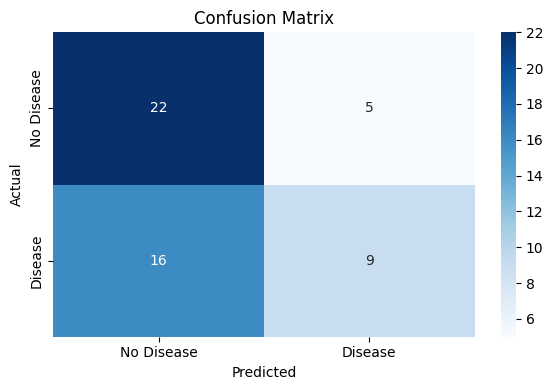

In [30]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [36]:
# we have feature age,bp ,cholestrol

sample = np.array([[20, 150, 500]])

# Predict
prediction = model.predict(sample)

print("Prediction:", "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease")

Prediction: Heart Disease Present
